<h1>Data Science - Forum  Assignment</h1>
By Alexander L. Myfia

1. Import sklearn library for SVM Implementation

In [32]:
# For SVM model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data visualization
import numpy as np
import matplotlib.pyplot as plt

2. Utilize sample dataset

In [33]:
x, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

3. Split datasets

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

4. Create SVM Model (this example uses RBF model)

In [35]:
svm = SVC(kernel = 'rbf', C = 1.0, gamma = 'scale')
svm.fit(x_train, y_train)
y_predict = svm.predict(x_test)

5. Check and Visualize prediction accuracy

Prediction Accuracy: 100.00


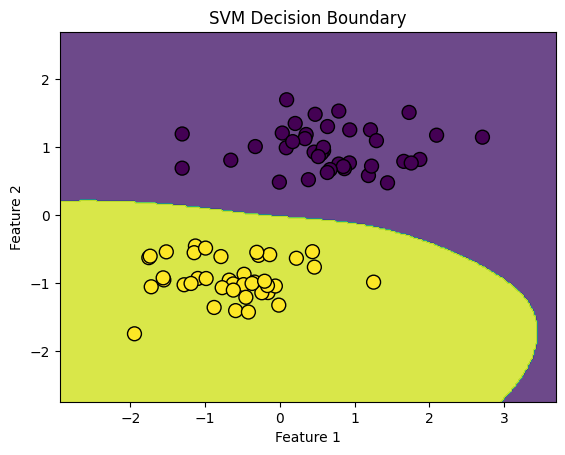

In [36]:
def plot_decision_boundary(x, y, model):
    h = .02 
    x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    z = model.predict(grid_points)
    z = z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, z, alpha=0.8)

    # Plot the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title("SVM Decision Boundary")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

accuracy = accuracy_score(y_test, y_predict)
print(f'Prediction Accuracy: {accuracy*10**2:.2f}')
plot_decision_boundary(x_train, y_train, svm)